# Artificial Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Gradiente descendente

In [14]:
func = lambda x:x**2
grad = lambda x:2*x
beta0=7
betas=[]

for i in range(30):
    beta1= beta0 - 0.05*grad(beta0)
    beta0=beta1
#     print(beta0)
    betas.append(beta0)

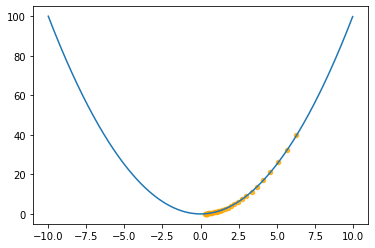

In [23]:
betas = np.array(betas)
x=np.arange(-10,10,.01)
plt.plot(x,func(x))
# plt.plot(x,2*x)
plt.scatter(betas,betas**2, s=20, alpha=0.8, c='orange');


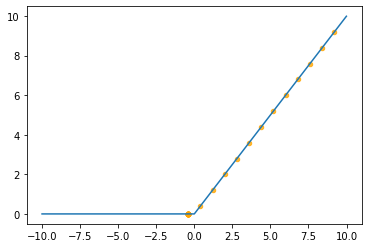

In [55]:
func = lambda x: max(0,x)
grad = lambda x: (func(x) - func(x-0.05))/0.05
x=np.arange(-10,10,.01)
y= [func(x) for x in x]
beta0=10
betas=[]

for i in range(30):
    beta1= beta0 - 0.8*grad(beta0)
    beta0=beta1
#     print(beta0)
    betas.append(beta0)

betas = np.array(betas)

    
plt.plot(x,y);
plt.scatter(betas,[func(betas) for betas in betas], s=20, alpha=0.8, c='orange');


- multilayer perceptrons

In [ ]:
def sig(z):
    return 1/(1+np.exp(-z))

In [ ]:
?plt.plot

In [ ]:
line = np.linspace(-3,3,100)
fig, axs = plt.subplots(1,3, figsize=(20,5))


#Tangente hiperbólica
axs[0].plot(line, np.tanh(line), label ='tanh', lw=4)
axs[0].set_ylim(-1,1)
axs[0].legend();

# Retificação Linear
axs[1].plot(line, np.maximum(line,0), label ='relu', lw=4)
axs[1].set_ylim(-1,1)
axs[1].legend();

# Sigmoide
axs[2].plot(line,sig(line), label='sigmoide', lw=4)
axs[2].set_ylim(-1,1)
axs[2].legend();

# plt.plot(line, sig(line), label ='sig')
# plt.title('activations functions'


**Alguns pontos gerais**
    
- Composto por neurios - imitam o cerebro humano    
    
-input - normalização é importante
    
-output - categórico ou contínuo (funciona tanto para regressão como classificação)
    
-A função de ativação pode ser diferente (relu - retified linear unit, sigmoid, etc). Exemple: é comum aplicar a relu nas camadas ocultas, e a the sigmoide na camada de saída

In [ ]:
#CASE 01

In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
# import mglearn

X,y = make_moons(n_samples = 400, noise=0.25, random_state=3)
X = pd.DataFrame(X, columns=['x1', 'x2'])
y = pd.Series(y, name='target')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=0, stratify=y)

classifier = MLPClassifier(hidden_layer_sizes=(100,),
                           activation='relu',
                           solver = 'lbfgs').fit(X_train, y_train)

C:\Users\fabio\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [47]:
def plot_decision_function(x1_axis,x2_axis,target, proba=False):

    fig, axis = plt.subplots(1,1, figsize=(20,10))

    X1, X2 = np.meshgrid(np.arange(start= X_train[x1_axis].min() -1, stop= X_train[x1_axis].max() +1, step = 0.01),
                         np.arange(start= X_train[x2_axis].min()-1, stop= X_train[x2_axis].max() +1, step = 0.01))


    if (proba):
        predictions = classifier.predict_proba(np.array([X1.ravel(), X2.ravel()]).T)[:,1].reshape(X1.shape)
    else:
        predictions = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

    # plota no treino
    train = pd.concat([X_train, y_train.reset_index()], axis=1)
    train.plot(x = x1_axis, y =x2_axis, c=target, kind = 'scatter', cmap = 'Spectral', s=100, alpha =0.6, ax=axis)
    axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)
    axis.set_title('Superfície de Decisão - Treino')
    plt.show()
    
    # plota no teste
    fig, axis = plt.subplots(1,1, figsize=(20,10))

    test = pd.concat([X_test, y_test.reset_index()], axis=1)
    test.plot(x = x1_axis, y =x2_axis, c=target, kind = 'scatter', cmap = 'Spectral', s=100, alpha =0.6, ax=axis)
    axis.contourf(X1,X2, predictions, cmap = 'Spectral', alpha = 0.2)
    axis.set_title('Superfície de Decisão - Teste')
    plt.show()

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


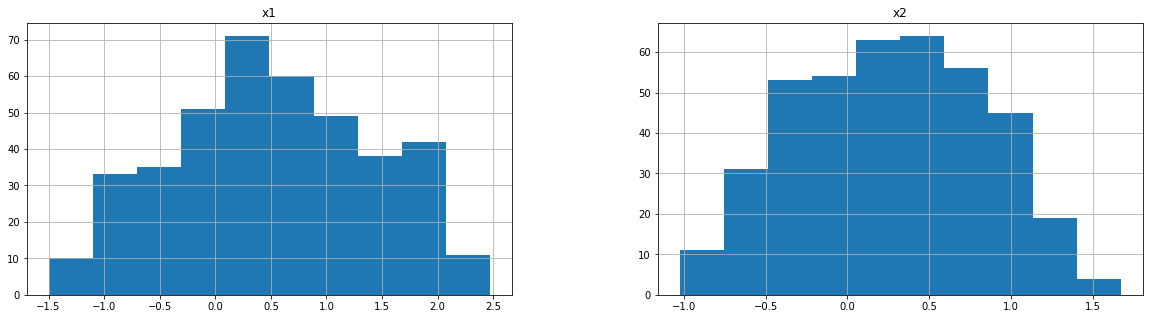

In [48]:
fig, axs = plt.subplots(1,2,figsize=(20,5));

for ax,column in zip(axs.ravel(),X.columns):
    X.hist(ax=ax)

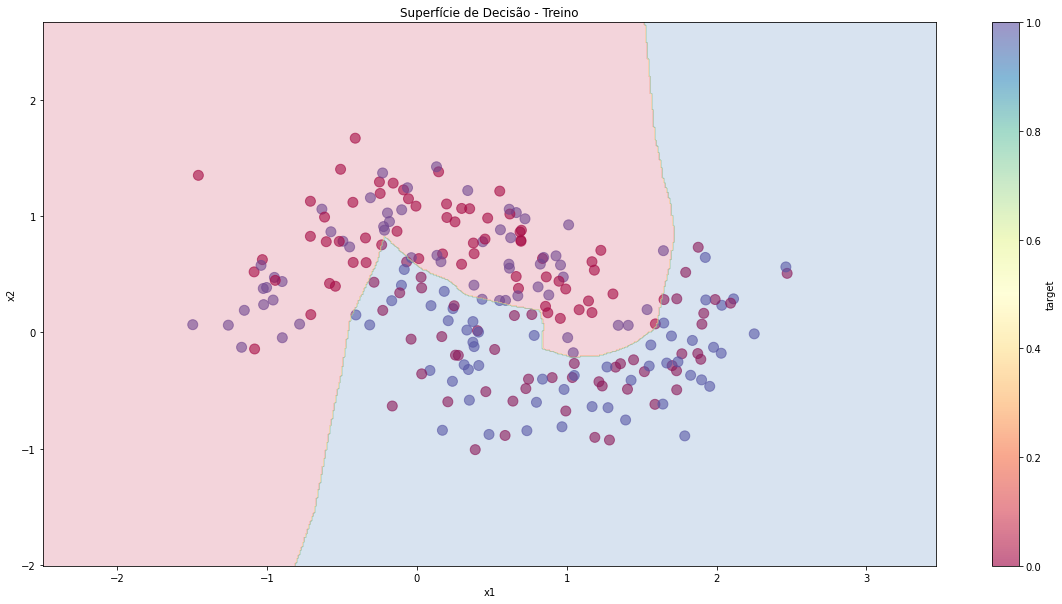

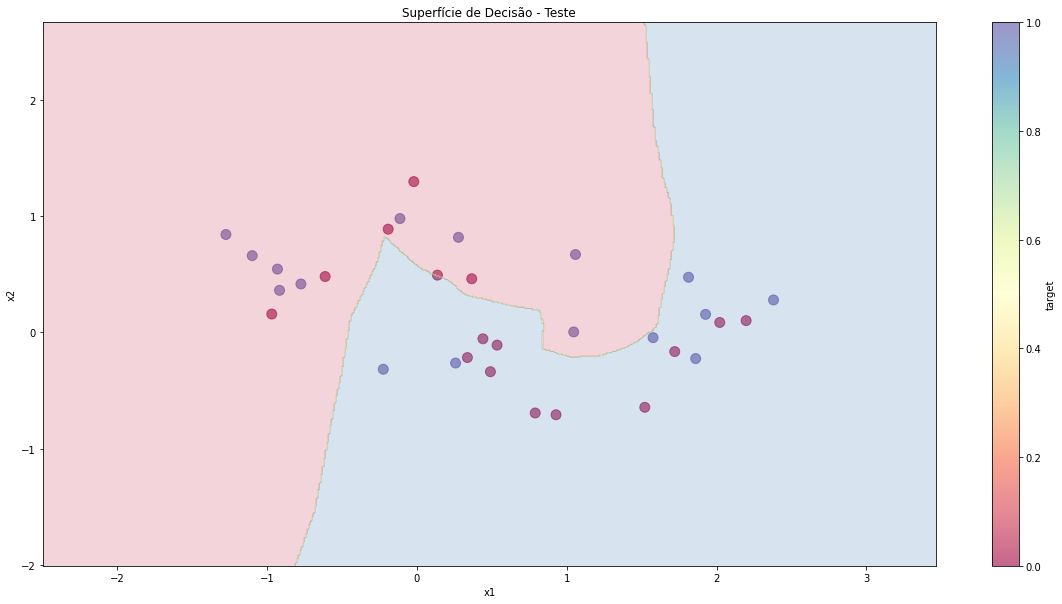

In [49]:
x1_axis = 'x1'
x2_axis= 'x2'
target = 'target'

plot_decision_function(x1_axis,x2_axis,target, proba=False)

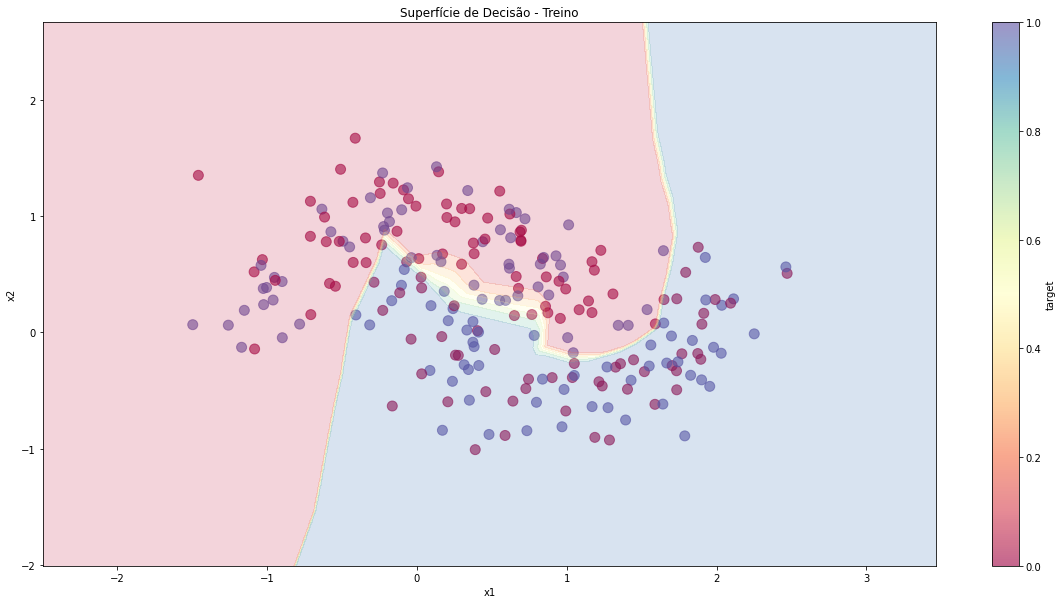

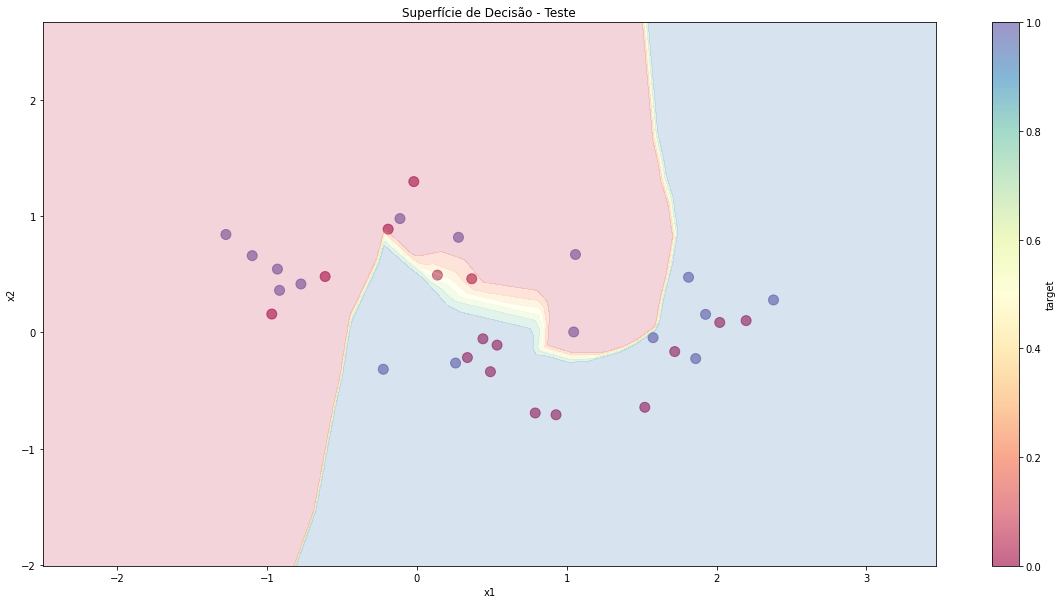

In [50]:
plot_decision_function(x1_axis,x2_axis,target, proba=True)

In [26]:
dataset=pd.read_csv(r"../Data/Churn_Modelling.csv")

In [27]:
import warnings
# warnings.filterwarnings("ignore")

In [28]:
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\fabio\Anaconda\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [29]:
# import tensorflow

In [30]:
import keras

In [31]:
# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

# # using one hot enconder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)

ds_encoded = pd.DataFrame(encoder.fit_transform(dataset[['Geography']]))

ds_encoded.columns = encoder.get_feature_names(['Geography'])

dataset.drop(['Geography'] ,axis=1, inplace=True)

dataset= pd.concat([dataset, ds_encoded], axis=1)

dataset = dataset[['RowNumber', 'CustomerId', 'Surname', 'Geography_France', 'Geography_Germany',
                   'Geography_Spain', 'Gender', 'CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                   'EstimatedSalary', 'Exited']]

X=dataset.iloc[:,4:-1].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [32]:
X.shape

(10000, 11)

In [33]:
from keras.models import Sequential
from keras.layers import Dense

#Initialising the ANN
classifier = Sequential()

#Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu',input_dim=11))

#Adding the second hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu'))

#Adding the second hidden layer
classifier.add(Dense(output_dim=6,kernel_initializer = 'uniform', activation='relu'))

#Adding the output layer (soft max: more than one category)
classifier.add(Dense(output_dim=1,kernel_initializer = 'uniform', activation='sigmoid'))

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=11, units=6)`
  
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=6)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=6)`
  
C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`


In [35]:
#Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

#Fit the ANN ti the training set
classifier.fit(X_train, y_train,batch_size = 10,nb_epoch=100, validation_data=(X_test, y_test))

C:\Users\fabio\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 7500 samples, validate on 2500 samples
Epoch 1/100
7500/7500 [==============================] - 1s 113us/step - loss: 0.3352 - accuracy: 0.8639 - val_loss: 0.3385 - val_accuracy: 0.8584
Epoch 2/100
7500/7500 [==============================] - 1s 96us/step - loss: 0.3360 - accuracy: 0.8628 - val_loss: 0.3369 - val_accuracy: 0.8600
Epoch 3/100
7500/7500 [==============================] - 1s 97us/step - loss: 0.3356 - accuracy: 0.8623 - val_loss: 0.3373 - val_accuracy: 0.8624
Epoch 4/100
7500/7500 [==============================] - 1s 97us/step - loss: 0.3366 - accuracy: 0.8633 - val_loss: 0.3345 - val_accuracy: 0.8608
Epoch 5/100
7500/7500 [==============================] - 1s 97us/step - loss: 0.3361 - accuracy: 0.8629 - val_loss: 0.3355 - val_accuracy: 0.8608
Epoch 6/100
7500/7500 [==============================] - 1s 93us/step - loss: 0.3358 - accuracy: 0.8623 - val_loss: 0.3375 - val_accuracy: 0.8600
Epoch 7/100
7500/7500 [==============================] - 1s 98us/step - los

In [ ]:
print(classifier.summary())

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = list(map(lambda p: 1 if p>0.5 else 0,y_pred))


from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver = 'lbfgs').fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators =10,criterion = 'entropy',bootstrap=True,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC

classifier= SVC(C=1, kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Training set score:{:.3f}\nTest set score:{:.3f}\n'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

## Case 3

In [1]:
from sklearn.datasets import fetch_california_housing
d = fetch_california_housing()

In [3]:
d

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
from sklearn.model_selection import train_test_split
import pandas as pd

X = pd.DataFrame(d.data, columns = d.feature_names)
y= pd.Series(d.target)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,)

print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))


X_train shape:(14448, 8)
y_train shape:(14448,)
X_test shape:(6192, 8)
y_test shape:(6192,)


In [15]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns= X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test), columns= X_train.columns)

In [19]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential

model = Sequential()
model.add(Dense(1 ,activation='relu', input_shape=(8,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Train on 14448 samples, validate on 6192 samples
Epoch 1/20
14448/14448 [==============================] - 0s 31us/step - loss: 4.4533 - val_loss: 3.0711
Epoch 2/20
14448/14448 [==============================] - 0s 29us/step - loss: 1.9469 - val_loss: 0.9876
Epoch 3/20
14448/14448 [==============================] - 0s 27us/step - loss: 0.9395 - val_loss: 0.7125
Epoch 4/20
14448/14448 [==============================] - 0s 26us/step - loss: 0.7766 - val_loss: 0.6494
Epoch 5/20
14448/14448 [==============================] - 0s 27us/step - loss: 0.7057 - val_loss: 0.6152
Epoch 6/20
14448/14448 [==============================] - 0s 25us/step - loss: 0.6599 - val_loss: 0.5921
Epoch 7/20
14448/14448 [==============================] - 0s 25us/step - loss: 0.6250 - val_loss: 0.5757
Epoch 8/20
14448/14448 [==============================] - 0s 25us/step - loss: 0.5971 - val_loss: 0.5612
Epoch 9/20
14448/14448 [==============================] - 0s 25us/step - loss: 0.5741 - val_loss: 0.5505
Epoch 

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
